In [46]:
# importing data
import pandas as pd
data = pd.read_csv('D:/MSBA/10 Applied Machine Learning/assignment/1/sgemm_product_dataset/sgemm_product.csv')
print(data.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  
0   0     115.26     115.87     118.55     115.80  
1   1      78.13      78.25      79.25      79.19  
2   0      79.84      80.69      80.76      80.97  
3   1      84.32      89.90      86.75      85.58  
4   0     115.13     121.98     122.73     114.81  


In [47]:
# checking shape of data
print(data.shape)

(241600, 18)


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB
None


In [48]:
# creating target variable (average of 4 runtime)
data['av_run'] = data[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis = 1).round(2)
print(data[['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)','av_run']].head())

   Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  av_run
0     115.26     115.87     118.55     115.80  116.37
1      78.13      78.25      79.25      79.19   78.70
2      79.84      80.69      80.76      80.97   80.56
3      84.32      89.90      86.75      85.58   86.64
4     115.13     121.98     122.73     114.81  118.66


In [49]:
# dropping 4 obselete run columns
data.drop(columns=['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], inplace = True)
data.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'av_run'],
      dtype='object')

In [50]:
# creating independent and dependent variables
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.head())
print(y.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  
0   0  
1   1  
2   0  
3   1  
4   0  
0    116.37
1     78.70
2     80.56
3     86.64
4    118.66
Name: av_run, dtype: float64


In [51]:
# adding X0 in X
import numpy as np
ones = np.ones(X.shape[0]).reshape(X.shape[0],1)
X = np.hstack((ones,X))
X[:2]

array([[ 1., 16., 16., 16.,  8.,  8.,  8.,  8.,  2.,  1.,  1.,  0.,  0.,
         0.,  0.],
       [ 1., 16., 16., 16.,  8.,  8.,  8.,  8.,  2.,  1.,  1.,  0.,  0.,
         0.,  1.]])

In [53]:
# splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(169120, 15)
(72480, 15)


In [54]:
# creating cost function
def cost(betas,X,y):
    m = len(y)
    y_hat = X.dot(betas)
    c = (1/(2*m))*(np.sum(np.square(y_hat-y)))
    return c

In [55]:
# generalized gradient discent using batch method
def gradient_descent1(X,y,lr,th):
    m = len(y)
    betas = np.zeros(X.shape[1])
    t = np.zeros(X.shape[1])
    c = []
    a = cost(betas,X,y)
    c.append(a)
    i = 0
    while i < th:
        y_hat = X.dot(betas)
        t = lr*(1/m)*(X.T.dot(y_hat-y))
        betas = betas - t
        #print(betas)
        a = cost(betas,X,y)
        #print('cost: ',a)
        c.append(a)
        i = i+1
        if c[-1] > c[-2]:
            break
    return (betas, c[-2:],i)

In [11]:
# gradient discent with matrix multiplication
import numpy as np
def betas_matrix(X,y):
    X_trans = X.T
    betas = np.zeros(X.shape[1])
    betas = np.linalg.inv(X.T@X)@X.T@y
    return betas

In [20]:
# converting training X and y into arrays
X = np.array(X_train)
y = np.array(y_train)
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
# calculating betas for X and y train using martix method
betas = betas_matrix(X_train,y_train)
print(betas)

[-52.80494286   3.3360934    3.07157809   5.18026704 -16.68004451
 -16.31771232   1.07746467   0.96169722   3.91773461  -1.18623736
  -3.0399407   -9.15705436   0.15714724  38.75780065  46.69633709]


In [11]:
# calculating betas for X and y train using batch method with different values of alpha
cost_list_list = {}
betas = {}
last_iteration = {}

for alpha in [0.00001,0.00003,0.00006,0.0001]:
    betas[alpha], cost_list_list[alpha], last_iteration[alpha] = gradient_descent1(X_train,y_train,alpha, 10000)
print(betas)
print(cost_list_list)
print(last_iteration)

{1e-05: array([ -0.1157548 ,   3.29571233,   3.00659614,   4.69521554,
       -16.27827949, -15.88200097,   0.90255283,   0.86343096,
         2.04589962,  -0.13170021,  -0.60658252,  -0.28269067,
        -0.05788066,   0.90100719,   1.09723534]), 3e-05: array([ -0.24650074,   3.30447869,   3.02656895,   4.91544658,
       -16.7545512 , -16.37464884,   0.99876883,   0.92620825,
         3.30498047,  -0.81925169,  -1.91601843,  -0.78006439,
        -0.11736064,   2.68683574,   3.2572395 ]), 6e-05: array([ -0.45258288,   3.31429499,   3.04474181,   4.91528925,
       -16.77050787, -16.40539551,   0.97422231,   0.8773302 ,
         3.52952858,  -1.33388463,  -2.88072192,  -1.48572016,
        -0.2045341 ,   5.19830764,   6.29701932]), 0.0001: array([ -0.73334434,   3.31768   ,   3.0520954 ,   4.90027902,
       -16.78369988, -16.42537241,   0.95660572,   0.84781641,
         3.53034407,  -1.59127708,  -3.35390049,  -2.35109981,
        -0.3128913 ,   8.26343408,  10.00860185])}
{1e-05: [4

In [43]:
betas[0.0001]

array([ -0.73334434,   3.31768   ,   3.0520954 ,   4.90027902,
       -16.78369988, -16.42537241,   0.95660572,   0.84781641,
         3.53034407,  -1.59127708,  -3.35390049,  -2.35109981,
        -0.3128913 ,   8.26343408,  10.00860185])

In [41]:
# calculating RMSE for different values of betas abtained using differet values of alpha in both test and train dataset
import math

X_test = np.array(X_test)
y_test = np.array(y_test)
rmse = {}
c, tr, te = [],[],[]

for alpha, beta in betas.items():
    c.append(alpha)
    tr.append(math.sqrt(2*cost(beta, X_train, y_train)))
    te.append(math.sqrt(2*cost(beta,X_test, y_test)))
    
rmse['Alpha'] = c
rmse['Train RMSE'] = tr
rmse['Test RMSE'] = te
rmse['Final Cost'] = [i[1] for i in cost_list_list.values()]
rmse = pd.DataFrame(rmse)
print(rmse)

     Alpha  Train RMSE   Test RMSE    Final Cost
0  0.00001  285.070022  286.777432  40632.458636
1  0.00003  284.821392  286.494334  40561.612696
2  0.00006  284.616974  286.282361  40503.410943
3  0.00010  284.402990  286.065531  40442.530474


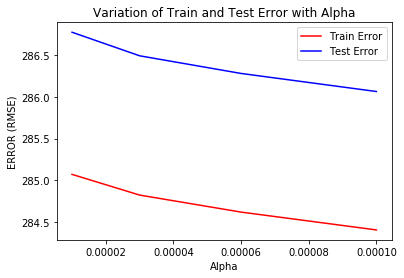

In [19]:
import matplotlib.pyplot as plt
plt.plot(rmse['Alpha'], rmse['Train RMSE'], label = 'Train Error', color = 'red')
plt.plot(rmse['Alpha'], rmse['Test RMSE'], label = 'Test Error', color = 'blue')
plt.title('Variation of Train and Test Error with Alpha')
plt.xlabel('Alpha')
plt.ylabel('ERROR (RMSE)')
plt.legend()
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.sqrt(mse(y_test, y_pred)))

285.0109206525314


In [58]:
betas_ma = betas_matrix(X_train,y_train)
print(math.sqrt(cost(betas_ma, X_train, y_train)))
print(math.sqrt(cost(betas_ma, X_test, y_test)))     

200.3605400672594
201.53315470562598


In [81]:
# Calculating RMSE with different thresholds 
cost_list_list = {}
betas = {}
last_iteration = {}

for th in [5000, 10000, 20000, 40000]:
    betas[th], cost_list_list[th], last_iteration[th] = gradient_descent1(X_train,y_train,0.0001, th)
    
print(betas)
print(cost_list_list)
print(last_iteration)

{5000: array([ -0.41392841,   3.30887792,   3.0317556 ,   4.94217708,
       -16.76001557, -16.45356051,   0.96712325,   1.00033212,
         3.43285215,  -1.29914839,  -2.68456843,  -1.0883175 ,
        -0.1072029 ,   4.44684361,   5.20392874]), 10000: array([ -0.7909576 ,   3.31471574,   3.04348466,   4.9259094 ,
       -16.77761279, -16.48178111,   0.94246232,   0.95964574,
         3.45845335,  -1.69149028,  -3.39451926,  -2.03702111,
        -0.18482077,   8.3915871 ,   9.81198848]), 20000: array([ -1.64723701,   3.31300763,   3.04329293,   4.86745711,
       -16.80459941, -16.51097223,   0.91243017,   0.9261004 ,
         3.37606902,  -1.89310883,  -3.68711565,  -3.66058682,
        -0.3615793 ,  14.89924272,  17.42050608]), 40000: array([ -3.7208535 ,   3.30923358,   3.03942318,   4.79301952,
       -16.83665294, -16.54196666,   0.87837504,   0.89344148,
         3.26379942,  -2.0639347 ,  -3.86747035,  -6.05719737,
        -0.756432  ,  23.76969654,  27.81267226])}
{5000: [4047

In [44]:
cost_list_list

{1e-05: [40632.469729332726, 40632.458636380565],
 3e-05: [40561.6195342441, 40561.61269642197],
 6e-05: [40503.42120256667, 40503.41094346461],
 0.0001: [40442.54407552901, 40442.53047387899]}

In [152]:
rmse_th = {}
c, tr, te = [],[],[]

for alpha, beta in betas.items():
    c.append(alpha)
    tr.append(math.sqrt(2*cost(beta, X_train, y_train)))
    te.append(math.sqrt(2*cost(beta,X_test, y_test)))
    
rmse_th['iterations'] = c
rmse_th['train'] = tr
rmse_th['test'] = te
rmse_th = pd.DataFrame(rmse_th)
print(rmse_th)

   iterations       train        test
0        5000  284.510475  285.088875
1       10000  284.238542  284.810794
2       20000  283.871075  284.430634
3       40000  283.516385  284.057694


In [45]:
# plotting RMSE with increase in number of iterations
plt.plot(rmse_th['iterations'], rmse_th['train'], label = 'Train Error', color = 'red')
plt.plot(rmse_th['iterations'], rmse_th['test'], label = 'Test Error', color = 'blue')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Variation of train and test RMSE with number of Iterations')
plt.legend()
plt.show()

NameError: name 'rmse_th' is not defined

In [108]:
# selecting 8 features randomly to train model
col_name = []
data.iloc[:,np.random.choice(range(14), size = 8, replace = False)].columns

Index(['SB', 'MDIMA', 'STRN', 'NDIMB', 'MDIMC', 'NWG', 'KWG', 'KWI'], dtype='object')

In [174]:
f8, tr, te = [],[],[]

for _ in range(5):
    cols = np.random.choice(range(1,14), size = 8, replace = False)
    f8.append(cols)
    X_train_8 = X_train[:, cols]
    X_train_8 = np.hstack((np.ones(X_train_8.shape[0]).reshape(X_train_8.shape[0],1), X_train_8))
    X_test_8 = X_test[:, cols]
    X_test_8 = np.hstack((np.ones(X_test_8.shape[0]).reshape(X_test_8.shape[0],1), X_test_8))
    beta, cost_list, last_iteration = gradient_descent1(X_train_8,y_train,0.0001, 40000)
    tr.append(np.sqrt(2*cost(beta, X_train_8, y_train)))
    te.append(np.sqrt(2*cost(beta, X_test_8, y_test)))

In [178]:
best_feature = {}
best_feature['feature'] = f8
best_feature['tr_rmse'] = tr
best_feature['test_rmse'] = te

features = pd.DataFrame(best_feature)
print(features)

                       feature     tr_rmse   test_rmse
0   [1, 9, 3, 12, 8, 4, 13, 7]  329.850317  330.368621
1   [7, 8, 5, 6, 3, 4, 12, 11]  346.606378  348.164755
2   [7, 8, 2, 11, 4, 1, 13, 9]  309.178036  309.052257
3  [12, 10, 1, 3, 13, 4, 5, 7]  308.066649  309.210744
4  [10, 9, 12, 13, 3, 6, 4, 8]  349.549560  349.786059


In [56]:
# selecting 8 prominant features to train model
f8 = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI']
X_train_8 = X_train[:,range(9)]
X_test_8 = X_test[:,range(9)]

# training a new model on chosen 8 features
beta_8, _, _ = gradient_descent1(X_train_8,y_train,0.0001, 40000)

print("Train Accuracy: ", np.sqrt(2*cost(beta_8, X_train_8, y_train)))
print("Test Accuracy: ", np.sqrt(2*cost(beta_8, X_test_8, y_test)))

Train Accuracy:  285.09381808336667
Test Accuracy:  286.7747545545055
